In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import multiprocessing
import time
import numpy as np
import scipy as sp
import emcee
import sys
import pickle
import taumod
import corner
from scipy import interpolate 
from IPython.display import display
%matplotlib inline

In [41]:
ndim= 3
nwalkers = 500

In [43]:
with open('Mg2SiO4_tau_retrieval.pic', 'rb') as input:
    fostchain,fostlnprob = pickle.load(input) 
fostsamples = fostchain[:, 1800:, :].reshape((-1, ndim))   
fostprob  = fostlnprob[:,1800:].reshape((-1))
print fostsamples.shape

(100000, 3)


In [31]:
with open('MgSiO3_tau_retrieval.pic', 'rb') as input:
    enstchain,enstlnprob = pickle.load(input) 
enstsamples = enstchain[:, 1800:, :].reshape((-1, ndim))  
enstprob  = enstlnprob[:,1800:].reshape((-1))
print enstsamples.shape

(100000, 3)


In [20]:
with open('Al2O3_tau_retrieval.pic', 'rb') as input:
    corchain,corlnprob = pickle.load(input) 
corsamples = corchain[:, 1800:, :].reshape((-1, ndim))  
corprob  = corlnprob[:,1800:].reshape((-1))
print corsamples.shape

(100000, 3)


In [14]:
with open('Fe_tau_retrieval.pic', 'rb') as input:
    fechain,felnprob = pickle.load(input) 
fesamples = fechain[:, 1800:, :].reshape((-1, ndim)) 
feprob  = felnprob[:,1800:].reshape((-1))
print fesamples.shape

(100000, 3)


In [7]:
print enstprob.shape
print np.argmax(enstprob)
print enstsamples.shape

(150000,)
28500
(150000, 3)


In [44]:
fetheta = np.asfortranarray(fesamples[np.argmax(feprob)],dtype='float64')
fosttheta = np.asfortranarray(fostsamples[np.argmax(fostprob)],dtype='float64')
ensttheta = np.asfortranarray(enstsamples[np.argmax(enstprob)],dtype='float64')
cortheta = np.asfortranarray(corsamples[np.argmax(corprob),:],dtype='float64')

print fostsamples[np.argmax(fostprob)], np.amax(fostprob)
print enstsamples[np.argmax(enstprob)], np.amax(enstprob)
print corsamples[np.argmax(corprob)], np.amax(corprob)
print fesamples[np.argmax(feprob)], np.amax(feprob)

#print minfesamples[np.argmax(minfeprob)], np.amax(minfeprob)
#print minenstsamples[np.argmax(minenstprob)], np.amax(minenstprob)

[  3.15739195e-01   5.99039263e-01   2.39107279e+09] 223.291237451
[  3.45141710e-01   2.23796686e+00   4.10687525e+10] 234.098306974
[  5.18409757e-02   1.74398609e+00   9.51650004e+10] 252.770039441
[  6.79068348e-02   3.91492052e-01   3.73605467e+09] 264.653186087


In [35]:
print fetheta
#print fosttheta
print ensttheta
print cortheta

[  6.79068348e-02   3.91492052e-01   3.73605467e+09]
[  3.45141710e-01   2.23796686e+00   4.10687525e+10]
[  5.18409757e-02   1.74398609e+00   9.51650004e+10]


In [6]:
wave  = np.arange(0.7,2.5,0.01)
with open('run_analysis/2M2224_pow_thick.pk1', 'rb') as input:
    sampler = pickle.load(input) 
print sampler.chain.shape
nwalkers = sampler.chain.shape[0]
niter = sampler.chain.shape[1]
ndim = sampler.chain.shape[2]
samples = sampler.chain[:,niter-2000:,:].reshape((-1,ndim))
cloudsamples = samples[:,ndim-9:ndim-5]
sid = np.zeros(5000)
tausamp = np.zeros([5000,wave.size])
for i in range (0,5000):
    sid[i]= np.random.randint(0,high = len(samples))
    cloudsamp = samples[sid[i],ndim-9:ndim-5]
    tau_0 = 1.0
    tpow = cloudsamp[3]
    tausamp[i,:] = tau_0 * np.power(wave,tpow)
tauspec = np.median(tausamp,0)
tauerr = np.std(tausamp,0)


(336, 30000, 21)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [45]:
sizdist = 2
fewave, fetau = taumod.cloudtau(fetheta,"Fe",sizdist)
fewave = fewave[::-1]
fetau = fetau[::-1]

fetesttau = np.zeros([5000,fewave.size])
ensttesttau = np.zeros([5000,fewave.size])
fosttesttau  = np.zeros([5000,fewave.size])
cortesttau  = np.zeros([5000,fewave.size])


for i in range (0,5000):
    sid[i]= np.random.randint(0,high = len(fesamples))
    testtheta = np.asfortranarray(fesamples[sid[i],:],dtype='float64')
    testwave,fetesttau[i,:] = taumod.cloudtau(testtheta,"Fe",sizdist)
    #plt.plot(testwave,testtau,'r-',alpha=0.1)
    testtheta = np.asfortranarray(fostsamples[sid[i],:],dtype='float64')
    testwave, fosttesttau[i,:] = taumod.cloudtau(testtheta,"Mg2SiO4",sizdist)
    #plt.plot(testwave,testtau,'c-',alpha=0.1)
    testtheta = np.asfortranarray(enstsamples[sid[i],:],dtype='float64')
    testwave, ensttesttau[i,:] = taumod.cloudtau(testtheta,"MgSiO3",sizdist)
    #plt.plot(testwave,testtau,'m-',alpha=0.1)
    testtheta = np.asfortranarray(corsamples[sid[i],:],dtype='float64')
    testwave, cortesttau[i,:] = taumod.cloudtau(testtheta,"Al2O3",sizdist)




/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [46]:
fetauspec = np.empty([3,testwave.size])
fosttauspec= np.empty([3,testwave.size])
ensttauspec = np.empty([3,testwave.size])
cortauspec = np.empty([3,testwave.size])

for i in range(0,testwave.size):
    junk = fetesttau[:,i]
    junk2 = np.percentile(junk, [16, 50, 84],axis=0)
    junk3 = np.array(junk2)
    fetauspec[:,i] = junk3[:]
    junk = fosttesttau[:,i]
    junk2 = np.percentile(junk, [16, 50, 84],axis=0)
    junk3 = np.array(junk2)
    fosttauspec[:,i] = junk3[:]
    junk = ensttesttau[:,i]
    junk2 = np.percentile(junk, [16, 50, 84],axis=0)
    junk3 = np.array(junk2)
    ensttauspec[:,i] = junk3[:]
    junk = cortesttau[:,i]
    junk2 = np.percentile(junk, [16, 50, 84],axis=0)
    junk3 = np.array(junk2)
    cortauspec[:,i] = junk3[:]


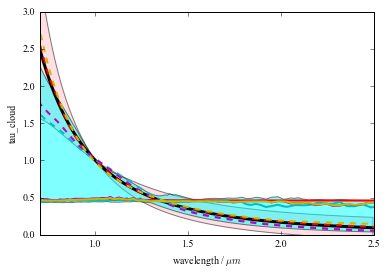

In [47]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0.7, 2.5,0.,3.])
#for i in range (0,2000):
#    sid[i]= np.random.randint(0,high = len(samples))
#    cloudsamp = samples[sid[i],ndim-10:ndim-5]
#    tau_0 = cloudsamp[0]
#    tpow = cloudsamp[4]
#    tauplot = tau_0 * np.power(wave,tpow)
#    plt.plot(wave,tauplot,'k-',alpha =0.1)





c1, = plt.plot(wave,tauspec,'k-',linewidth=3,label=(r'$\tau^{\alpha}$'))
plt.fill_between(wave,(tauspec-tauerr),(tauspec+tauerr),facecolor='pink',alpha=(0.5))


#for i in range (0,5000):
#        plt.plot(testwave,fetesttau[i,:],'r',alpha=0.005)
#       plt.plot(testwave,fosttesttau[i,:],'c',alpha=0.005)
#        plt.plot(testwave,ensttesttau[i,:],'m',alpha=0.005)
#        plt.plot(testwave,cortesttau[i,:],'y',alpha=0.005)

fewave, fetau = taumod.cloudtau(fetheta,"Fe",sizdist)
fewave = fewave[::-1]
fetau = fetau[::-1]
plt.plot(fewave,fetau,'r--',linewidth=2)
c2, = plt.plot(testwave,fetauspec[1,:],'r-',linewidth=2,label=('Fe'))
#plt.fill_between(testwave,(fetauspec[0,:]),(fetauspec[2,:]),facecolor='orange',alpha=(0.5))

#plt.plot(testwave,fetest[1,:],'c-')
#
fostwave, fosttau = taumod.cloudtau(fosttheta,"Mg2SiO4",sizdist)
plt.plot(fostwave,fosttau,'c--',linewidth=2)
#fostwave = fostwave[::-1]
#fosttau = fosttau[::-1]
c3, = plt.plot(testwave,fosttauspec[1,:],'c-',linewidth=2,label=('Mg2SiO4'))
plt.fill_between(testwave,(fosttauspec[0,:]),(fosttauspec[2,:]),facecolor='cyan',alpha=(0.5))


enstwave, ensttau = taumod.cloudtau(ensttheta,"MgSiO3",sizdist)
plt.plot(enstwave,ensttau,'m--',linewidth=2)
enstwave = enstwave[::-1]
ensttau = ensttau[::-1]
c4, = plt.plot(testwave,ensttauspec[1,:],'m-',linewidth=2,label=('MgSiO3'))
#plt.fill_between(testwave,ensttauspec[0,:],ensttauspec[2,:],facecolor='magenta',alpha=(0.5))

corwave, cortau = taumod.cloudtau(cortheta,"Al2O3",sizdist)
corwave = corwave[::-1]
cortau = cortau[::-1]
plt.plot(corwave,cortau,'y--',linewidth=2)
c5, = plt.plot(testwave,cortauspec[1,:],'y-',linewidth=2,label=('Al2O3'))
#plt.fill_between(testwave,(cortauspec[0,:]),(cortauspec[2,:]),facecolor='yellow',alpha=(0.5))


#minfewave, minfetau = taumod.cloudtau(minfetheta,"Fe",1)
#minfewave = minfewave[::-1]
#minfetau = minfetau[::-1]
#plt.plot(minfewave,minfetau,'k-')


#minenstwave, minensttau = taumod.cloudtau(minensttheta,"MgSiO3",1)
#minenstwave = minenstwave[::-1]
#minensttau = minensttau[::-1]
#plt.plot(minenstwave,minensttau,'r-')

#plt.legend(handles=[c1,c2,c3,c4,c5])




plt.ylabel(r'tau_cloud')
plt.xlabel('wavelength / $\mu m$')
#plt.savefig('2M2224_TAU_SPAG.png',format='png', dpi=720)

In [24]:
print ensttheta
print fosttheta
print fetheta
print sizdist
print taumod.cloudtau.__doc__
print fesamples

[  1.12986945e-01   5.37483732e-01   1.36721272e+09]
[  1.97263681e+00   6.51313792e-01   1.54896194e+09]
[  9.49380638e-01   3.03931116e-01   1.48539458e+09]
2
miewavelen,tau = cloudtau(theta,cloudname,sizdist)

Wrapper for ``cloudtau``.

Parameters
----------
theta : input rank-1 array('d') with bounds (3)
cloudname : input string(len=50)
sizdist : input int

Returns
-------
miewavelen : rank-1 array('d') with bounds (196)
tau : rank-1 array('d') with bounds (196)

[[  1.18086615e+00   2.84807984e-01   1.38473679e+09]
 [  1.18086615e+00   2.84807984e-01   1.38473679e+09]
 [  1.18086615e+00   2.84807984e-01   1.38473679e+09]
 ..., 
 [  9.02413739e-01   5.14162793e-01   1.35649466e+09]
 [  9.02413739e-01   5.14162793e-01   1.35649466e+09]
 [  9.02413739e-01   5.14162793e-01   1.35649466e+09]]


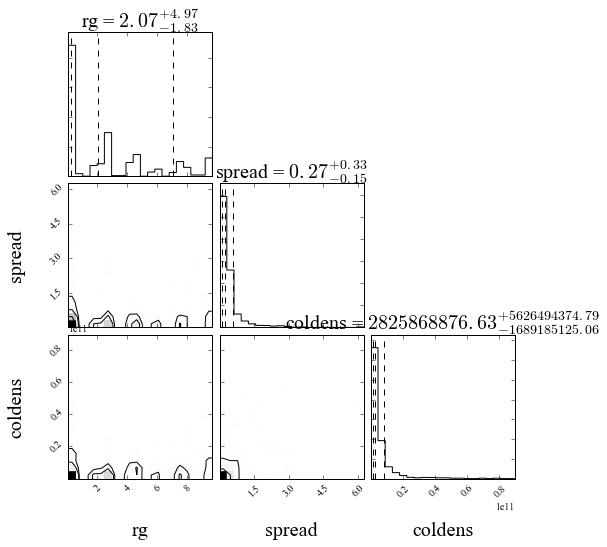

In [48]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
fig = corner.corner(fostsamples, labels=["rg", "spread", "coldens"],scale_hist=False,plot_datapoints =False,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 20},label_kwargs={"fontsize": 20})